In [1]:
# this file used to train the model
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [2]:
datasetdir = r'C:\Users\Yavuz\Documents\Projects\disertation\test\DeepFashion\Train'
os.chdir(datasetdir)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 5

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer', 'Blouse', 'Cardigan', 'Dress', 'Jacket',
                 'Jeans', 'Jumpsuit', 'Romper', 'Shorts', 'Skirts', 'Sweater', 'Sweatpants', 'Tank', 'Tee', 'Top'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [5]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)

Found 7656 images belonging to 15 classes.
Found 842 images belonging to 15 classes.


In [6]:
# Function for plots images with labels within jupyter notebook
X_train, y_train = next(train_dataset)

In [7]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [8]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [9]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(15, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
for layer in conv_model.layers:
    layer.trainable = False

In [11]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['acc'])

In [12]:
history = full_model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=2,
    epochs=10,
)

full_model.save(r"C:\Users\Yavuz\Documents\Projects\disertation\test\mytest\model_full_1.h5")
full_model.save_weights(r"C:\Users\Yavuz\Documents\Projects\disertation\test\mytest\model_weights_1.h5")

Epoch 1/10
1532/1532 [==============================] - 886s 578ms/step - loss: 2.5309 - acc: 0.2964 - val_loss: 2.0966 - val_acc: 0.3539
Epoch 2/10
1532/1532 [==============================] - 834s 544ms/step - loss: 1.9849 - acc: 0.3763 - val_loss: 1.9206 - val_acc: 0.3741
Epoch 3/10
1532/1532 [==============================] - 849s 554ms/step - loss: 1.7687 - acc: 0.4292 - val_loss: 1.9113 - val_acc: 0.3527
Epoch 4/10
1532/1532 [==============================] - 798s 521ms/step - loss: 1.6783 - acc: 0.4624 - val_loss: 1.8881 - val_acc: 0.3943
Epoch 5/10
1532/1532 [==============================] - 901s 588ms/step - loss: 1.5580 - acc: 0.4835 - val_loss: 1.8772 - val_acc: 0.4181
Epoch 6/10
1532/1532 [==============================] - 892s 582ms/step - loss: 1.4603 - acc: 0.5152 - val_loss: 1.8369 - val_acc: 0.4204
Epoch 7/10
1532/1532 [==============================] - 866s 565ms/step - loss: 1.4260 - acc: 0.5255 - val_loss: 1.8161 - val_acc: 0.4406
Epoch 8/10
1532/1532 [============

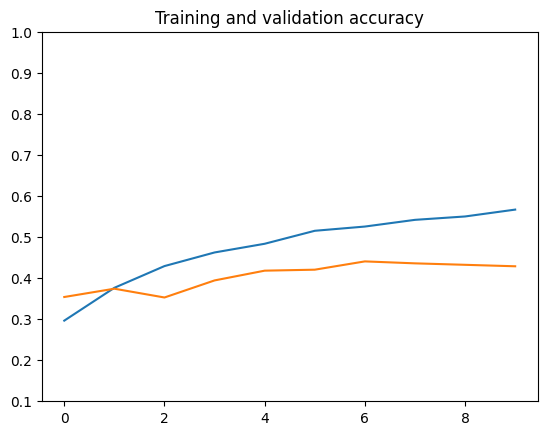

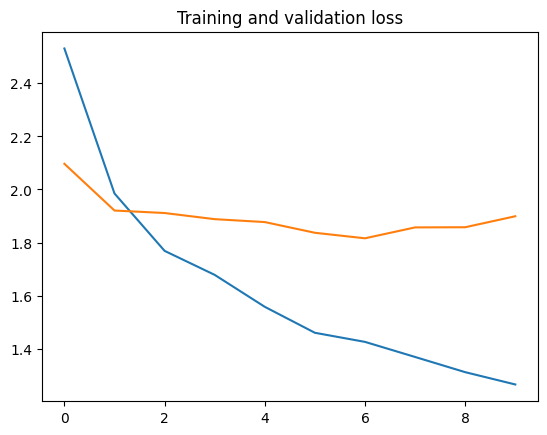

In [13]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()
    
plot_history(history, yrange=(0.1,1))

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=r'C:\Users\Yavuz\Documents\Projects\disertation\test\DeepFashion\Test'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
# X_test, y_test = next(test_generator)

Testresults = full_model.evaluate(test_generator)
print("test loss, test acc:", Testresults)

Found 1009 images belonging to 14 classes.


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Yavuz\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Yavuz\AppData\Local\Temp\ipykernel_10472\2410964129.py", line 1, in <module>
      history = full_model.fit(
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1729, in fit
      val_logs = self.evaluate(
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1790, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\Yavuz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5565, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[3,15] labels_size=[3,14]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_9208]

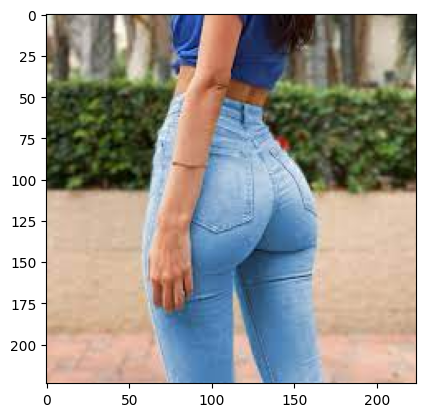

In [15]:
import keras.utils as image
from keras.applications.vgg16 import preprocess_input

img_path = r'C:\Users\Yavuz\Documents\Projects\disertation\test\mytest\b.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [16]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
    
Predicted_Class=np.argmax(x, axis = 1).all()
print('Predicted_Class is:', Predicted_Class)     #Get the rounded value of the predicted class
true_index = 5
# print('true_label is:', true_labels)     #Get the rounded value of the predicted class
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(Predicted_Class))

Predicted_Class is: False
True label: Jumpsuit
Predicted label: Blazer


In [17]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
preds = full_model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)
print (pred_labels)
print (true_labels)

Found 1009 images belonging to 14 classes.
1/1 [==============================] - 0s 488ms/step
[1 1 1]
[8 2 0]


In [18]:
mispred_img = X_test[pred_labels!=true_labels]
mispred_true = true_labels[pred_labels!=true_labels]
mispred_pred = pred_labels[pred_labels!=true_labels]
print ('number of misclassified images:', mispred_img.shape[0])

number of misclassified images: 3


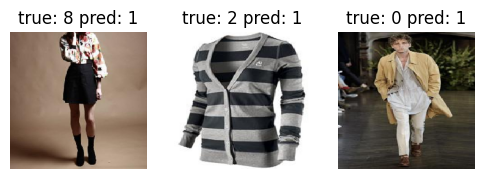

In [19]:
def plot_img_results(array, true, pred, i, n=1):
    # plot the image and the target for sample i
    ncols = 3
    nrows = 2
    fig = plt.figure( figsize=(ncols*2, nrows*2), dpi=100)
    for j in range(n):
      index = j+i
      plt.subplot(nrows,ncols, j+1)
      plt.imshow(array[index])
      plt.title('true: {} pred: {}'.format(true[index], pred[index]))
      plt.axis('off')

plot_img_results(mispred_img, mispred_true, mispred_pred, 0, len(mispred_img))

In [20]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=7, class_mode='categorical')
X_test, y_test = next(test_generator)
X_test=X_test/255
image = X_test[2]
true_index = np.argmax(y_test(2))
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = full_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

Found 1009 images belonging to 14 classes.


TypeError: 'numpy.ndarray' object is not callable